# Brandon Inscoe
## Final Semester Project
## Heat Flow in a Rod Using the Finite Difference Method (FDM)

In [109]:
from __future__ import division, print_function
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio as im
from IPython.display import Image
from tqdm import tqdm
from mplEasyAnimate import animation

In this project, I am looking into the heat flow of a rod. The rod is initially at room temperature of $20^{\circ}$Celsius. A heat source of $100^{\circ}$Celsius is placed at one end, while the other end is held at room temperature. How will the heat spread throughout the rod?

To calculate this, I will use the Finite Difference Method (FDM).
To begin, I will use the Transient Heat Conduction Eqn.:
$${\rho}c_p {\lambda}\Big({\frac{dT}{dt}}\Big) = {\lambda}\Big({\frac{d^2 T}{dx^2}}\Big) $$
where
$${\frac{dT}{dt}} = {\frac{T^{n+1}_i - T^{n}_i}{\Delta{t}}}$$
and
$${\frac{d^{2}T}{dt^{2}}} = {\frac{T^{n}_{i+1} - 2T^{n}_i + T^{n}_{i-1}}{\Delta{t}}}$$

Substituting these values back in as the derivatives and solving for $T^{n+1}_i$, the time step for location $i$ is 
$$T^{n+1}_i = T^{n}_i + {\Delta{t}} {\frac{\lambda}{{\rho}c_p}}\Big({\frac{T^{n}_{i+1} - 2T^{n}_i + T^{n}_{i-1}}{(\Delta{x})^2}}\Big)$$

In [110]:
# Spatial conditions

L = 0.5   #Length of rod (0.5 meter)

dx = 0.01   #interval of length
nx = int(L/dx)+1    # number of calculating points
x = np.linspace(0,L,nx)  #number of x-locations

In [111]:
# Time conditions
t_sim = 1200  #simulation time, 300s = 5 min, 1200s = 20 min
dt = 0.5      #change in time
nt = int(t_sim/dt)  #number of time steps

In [112]:
# Material properties (I used information for cast iron)
rho = 7874   #density of rod, kg/m^3
cp = 460    # heat capacitance of material, J/kg/K
hc = 55     #heat conductance of material W/m/k

In [113]:
T_A = 293.15
T = np.ones(nx)*T_A

for n in range(1,nt):
    
    Tn = T.copy()
    
    T[1:-1] = Tn[1:-1]+ dt*(hc/(rho*cp))*(Tn[2:]-2*Tn[1:-1] + Tn[0:-2])/dx**2
    
    T[0] = 373.15
    T[-1] = T[-2]
    



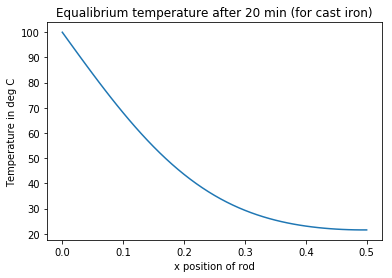

In [114]:
plt.figure()
plt.title("Equalibrium temperature after 20 min (for cast iron)")
plt.xlabel('x position of rod')
plt.ylabel('Temperature in deg C')
plt.plot(x,T-273.15)
plt.show()
#plt.savefig('rod_equil.jpg', format = 'jpg', dpi=500)

In [115]:
from IPython.display import HTML

def playVideo(path):
    return HTML("""
                <video width="320" height="240" controls>
                  <source src="{}" type="video/mp4">
                </video>
                """.format(path))

In [116]:
t = 0
images = []
Ta = []
#Ta.append(t)
#xa = []
#plt.figure(figsize=(6,7), dpi=100)
T_A = 293.15
T = np.ones(nx)*T_A
anim = animation('TestVideo.mp4', fps=30)
for n in tqdm(range(t_sim)):
    
    t = t + 1
    
    Ta.append(t)
    
    Tn = T.copy()
    
    T[1:-1] = Tn[1:-1]+ dt*(hc/(rho*cp))*(Tn[2:]-2*Tn[1:-1] + Tn[0:-2])/dx**2
    
    T[0] = 373.15
    T[-1] = T[-2]
    fig = plt.figure()
    plt.title('Equalibrium temperature after 20 min (for cast iron)')
    plt.plot(Ta[n],'b-')
    plt.plot(x,T-273.15,'K')
    plt.xlabel('x-position of rod')
    plt.ylabel('temperature, deg C')
    plt.ylim(0, 110)
    

    
    anim.add_frame(fig)
    plt.close(fig)
anim.close()



100%|██████████| 1200/1200 [01:55<00:00, 10.39it/s]


In [117]:
playVideo('TestVideo.mp4')

I also did it with a blowtorch, which has a flame temperature of $1300^{\circ}$Celsius.

In [118]:
t = 0
images = []
Ta = []
#Ta.append(t)
#xa = []
#plt.figure(figsize=(6,7), dpi=100)
T_A = 293.15
T = np.ones(nx)*T_A
anim = animation('TestVideo2.mp4', fps=30)
for n in tqdm(range(t_sim)):
    
    t = t + 1
    
    Ta.append(t)
    
    Tn = T.copy()
    
    T[1:-1] = Tn[1:-1]+ dt*(hc/(rho*cp))*(Tn[2:]-2*Tn[1:-1] + Tn[0:-2])/dx**2
    
    T[0] = 1573.15
    T[-1] = T[-2]
    fig = plt.figure()
    plt.title('Equalibrium temperature after 20 min (using blowtorch)')
    plt.plot(Ta[n],'b-')
    plt.plot(x,T-273.15,'K')
    plt.xlabel('x-position of rod')
    plt.ylabel('temperature, deg C')
    #plt.ylim(0, 110)
    

    
    anim.add_frame(fig)
    plt.close(fig)
anim.close()



100%|██████████| 1200/1200 [01:51<00:00, 10.75it/s]


In [119]:
playVideo('TestVideo2.mp4')

## Conclusion

If a heat source is placed at one end of the rod and left there, while the other end is still at room temperature, the temperature in the rod will settle to a steady temperature at each x-position of the rod. I used various temperatures from a heat sources such as a blowtorch, which has a flame temperature of $1300^{\circ}$Celsius. The curves had relatively the same shape. I used the FDM because this application is similar to a load on a string.

## <font color='red'> Questions?</font>

## Bibliography

Wang, Jay; _Computational Modeling and Visualization of Physical Systems With Python_; (Wiley, 2015)

https://stackoverflow.com/questions/47129097/ftcs-algorithm-for-the-heat-equation

https://scicomp.stackexchange.com/questions/18828/temperature-dependent-1-d-conduction-in-python

Thanks to Thomas Boudreaux for his help with the EasyAnimate package.